**CASO PRACTICO 3 - Optimization**

En este caso partiremos de los valores de inventario obtenidos en el caso anterior. Podes verlo acá: https://colab.research.google.com/drive/1Rzd3cWfmuVl78148gGSzY_ZAhtcj8Y0g?authuser=1#scrollTo=jwTFS-7fef60 . Conociendo los costos de compra, recepción, potencial interés a ganar y demanda del material requerida obtendremos mediante un algoritmo de optimización la cantidad optima por lote de reposición.


In [43]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, art3d
from matplotlib import cm
from matplotlib.patches import Circle

diasmes = 30
interes = 0.08 # 8% mensual

# Datos producto 1:
b_1 = 35 #costo por producto

compra_1 = 50 # unidad 
calidadrecepcion_1 = 120 # pedido
demanda_1 = 2272.5 # por mes
k_1 = calidadrecepcion_1 + compra_1 # costo de orden
d_1 = demanda_1 # demanda
i_1 = interes # mismo interés para ambos productos

# Datos producto 2:
b_2 = 40 #costo por producto

compra_2 = 50 # unidad 
calidadrecepcion_2 = 150 # pedido
demanda_2 = 688.64 # por mes
k_2 = calidadrecepcion_2 + compra_2 # costo de orden
d_2 = demanda_2 # demanda
i_2 = interes # mismo interés para ambos productos

Primero defino los cálculos para la función del "Costo total esperado". Esta se encuentra definida por otros sub-costos. Si queres conocer más sobre la teoría de inventarios entra aquí: http://invdeoperacionesingndustrial.blogspot.com/p/inventarios.html

  COSTO TOTAL ESPERADO:

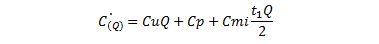


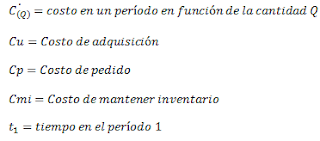

In [73]:
  """Costo de adquisicion. 
    @PARAM b = costo por producto
    @PARAM d = demanda (unidades por mes)
  """
def calcular_cadq(b, d):
    return b * d

In [76]:
  """Costo de mantenerlo en stock. 
    @PARAM q = cantidad por pedido
    @PARAM b = costo por producto
    @PARAM i = interes
  """
def calcular_cstock(q, b, i):
    return 0.5 * q * (b * i)

In [77]:
  """Costo de pedido. 
    @PARAM k = costo de orden
    @PARAM d = demanda (unidades por mes)
    @PARAM q = cantidad por pedido
  """
def calcular_cpedido(k, d, q):
    return  k * (d / q)

In [78]:
   """Costo Total Esperado. 
    @PARAM cdemanda = Costo de adquisicion
    @PARAM cstock = Costo de mantenerlo en stock
    @PARAM cpedido = Costo de pedido
  """
def calcular_cte(cdemanda, cstock, cpedido):
    return cdemanda + cstock + cpedido

La teoría de inventarios nos dice que el lote optimo es para el cual el "Costo Total Esperado" es el mínimo. Con esta premisa podemos a optimizar la función expuesta con la finalidad de conocer nuestro Q1 y Q2 óptimo.

In [79]:
# Creo la funcion a optimizar, F1(x) (del primer producto)
def Optimizacion_1(x):
    """Optimizacion de producto 1
    @PARAM x = Cantidad por lote
    """
    return  b_1 * d_1 + 0.5 * x * (b_1 * i_1) + k_1 * (d_1 / x) 

# Aplico el algoritmo de minizacion    
x0 = np.array([1])
res = minimize(Optimizacion_1, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

print(res.x)
q1_opt = res.x[0]

Optimization terminated successfully.
         Current function value: 81008.356893
         Iterations: 49
         Function evaluations: 110
[525.30603027]


In [80]:
# Creo la funcion a optimizar, F1(x) (del segundo producto)
def Optimizacion_2(x):
    """Optimizacion de producto 2
    @PARAM x = Cantidad por lote
    """
    return  b_2 * d_2 + 0.5 * x * (b_2 * i_2) + k_2 * (d_2 / x) 

# Aplico el algoritmo de minizacion  
x0 = np.array([1])
res = minimize(Optimizacion_2, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

print(res.x)
q2_opt = res.x[0]

Optimization terminated successfully.
         Current function value: 28484.460586
         Iterations: 48
         Function evaluations: 107
[293.39394836]


Conociendo el lote óptimo puedo calculo los costos asociados.

In [81]:
# Producto 1:
cdemanda1 = calcular_cadq(b_1, d_1)
# Producto 2:
cdemanda2 = calcular_cadq(b_2, d_2)

# Print:
print(f"Costo de adquisición, producto 1: {cdemanda1:.2f}, producto 2: {cdemanda2:.2f}")

Costo de adquisición, producto 1: 79537.50, producto 2: 27545.60


In [82]:
# Producto 1:
cstock1 = calcular_cstock(q1_opt, b_1, i_1)
# Producto 2:
cstock2 = calcular_cstock(q2_opt, b_2, i_2)

# Print:
print(f"Costo de almacenamiento, producto 1: {cstock1:.2f}, producto 2: {cstock2:.2f}")

Costo de almacenamiento, producto 1: 735.43, producto 2: 469.43


In [83]:
# Producto 1:
cpedido1 = calcular_cpedido(k_1, d_1, q1_opt)
# Producto 2:
cpedido2 = calcular_cpedido(k_2, d_2, q2_opt)

# Print:
print(f"Costo de pedido, producto 1: {cpedido1:.2f}, producto 2: {cpedido2:.2f}")

Costo de pedido, producto 1: 735.43, producto 2: 469.43


In [84]:
# Producto 1:
cte_opt1 = calcular_cte(cdemanda1, cstock1, cpedido1)
# Producto 2:
cte_opt2 = calcular_cte(cdemanda2, cstock2, cpedido2)

# Print:
print(f"Costo Total Esperado, producto 1: {cte_opt1:.2f}, producto 2: {cte_opt2:.2f}")

Costo Total Esperado, producto 1: 81008.36, producto 2: 28484.46


In [85]:
# Total:
cte_opt_t = cte_opt1 + cte_opt2

# Print:
print(f'El Costo Total Esperado óptimo es: {cte_opt_t:.2f}')

El Costo Total Esperado óptimo es: 109492.82


En este punto pudimos optimizar el lote para bajar los costos. Sin embargo, resulta difícil verlo. Podríamos ver el trabajo que hizo el algoritmo con un gráfico 3D con una superficie de valores conformada por Q1 y Q2.

In [86]:
# Genero un array con los valores de Q1 y Q2 que voy a calcular
q1_linspace = np.linspace(1,1000, 1000)
q2_linspace = np.linspace(1,1000, 1000)

In [87]:
# Genero un mesgrid relacionado
Q1, Q2 = np.meshgrid(q1_linspace, q2_linspace)

# Visualizamos:
print(f"Malla de valores para q_1:\n {Q1}\n")
print(f"Malla de valores para q_2:\n {Q2}")

Malla de valores para q_1:
 [[   1.    2.    3. ...  998.  999. 1000.]
 [   1.    2.    3. ...  998.  999. 1000.]
 [   1.    2.    3. ...  998.  999. 1000.]
 ...
 [   1.    2.    3. ...  998.  999. 1000.]
 [   1.    2.    3. ...  998.  999. 1000.]
 [   1.    2.    3. ...  998.  999. 1000.]]

Malla de valores para q_2:
 [[   1.    1.    1. ...    1.    1.    1.]
 [   2.    2.    2. ...    2.    2.    2.]
 [   3.    3.    3. ...    3.    3.    3.]
 ...
 [ 998.  998.  998. ...  998.  998.  998.]
 [ 999.  999.  999. ...  999.  999.  999.]
 [1000. 1000. 1000. ... 1000. 1000. 1000.]]


In [88]:
# Creamos el vector para guardar los valores de CTE de ambos productos:
vect_cte2 = np.zeros(Q1.shape[0] * Q1.shape[1])

# Iteramos para cada combinación de cantidades:
for i, (q1_i, q2_i) in enumerate(zip(np.ravel(Q1), np.ravel(Q2))):
    # Calculamos costo de demanda:
    cdemanda_i_1 = calcular_cadq(b_1, d_1)
    cdemanda_i_2 = calcular_cadq(b_2, d_2)
    cdemanda_i_tot = cdemanda_i_1 + cdemanda_i_2
    
    # Actualizar vector de costo de almacenamiento:
    cstock_i_1 = calcular_cstock(q1_i, b_1, i_1)
    cstock_i_2 = calcular_cstock(q2_i, b_2, i_2)
    cstock_i_tot = cstock_i_1 + cstock_i_2
    
    # Actualizar vector de costo de pedido:
    cpedido_i_1 = calcular_cpedido(k_1, d_1, q1_i)
    cpedido_i_2 = calcular_cpedido(k_2, d_2, q2_i)
    cpedido_i_tot = cpedido_i_1 + cpedido_i_2
    
    # Calculamos el costo total de ambos productos:
    cte_i_1 = calcular_cte(cdemanda_i_1, cstock_i_1, cpedido_i_1)
    cte_i_2 = calcular_cte(cdemanda_i_2, cstock_i_2, cpedido_i_2)
    cte_i_tot = cte_i_1 + cte_i_2
    
    # Guardamos el resultado de la iteración en el vector:
    vect_cte2[i] = cte_i_tot

In [89]:
CTE2 = vect_cte2.reshape(Q1.shape)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


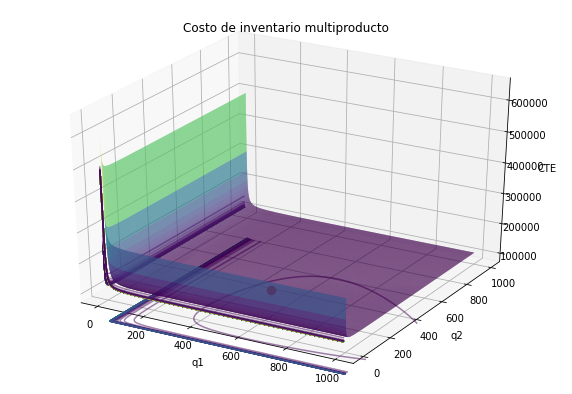

In [91]:
# Ploteamos la figura:
fig = plt.figure(figsize=(10,7))

# Ploteamos la superficie
ax = plt.axes(projection='3d')
ax.plot_surface(Q1, Q2, CTE2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# Para darle suavidad a la superficie:
  # Countour en z:
ax.contour(Q1, Q2, CTE2, 120, offset=-50, linestyles="solid", alpha=0.5)

  # Proyecciones en x, y:
ax.contour(Q1, Q2, CTE2, 120, offset=-10, linestyles="solid", alpha=0.5, zdir='x')
ax.contour(Q1, Q2, CTE2, 120, offset=-10, linestyles="solid", alpha=0.5, zdir='y')

# Agregar punto óptimo obtenido con la optimizacion:
ax.scatter([q1_opt], [q2_opt], [cte_opt_t], color="r", s=20, marker='o', linewidth=5)

ax.set_title('Costo de inventario multiproducto')
ax.set_xlabel('q1')
ax.set_ylabel('q2')
ax.set_zlabel('CTE')

plt.show()

En el grafico podemos notar como según se modifica el Q1 y Q2 el costo total esperado varia. También confirmamos que el punto optimizado representa un CTE muy bajo en comparación de los otros. Sin embargo, resulta difícil ver la variación del precio en cantidades cercanas, esto podríamos conocerlo haciendo una gráfica de isocoste.

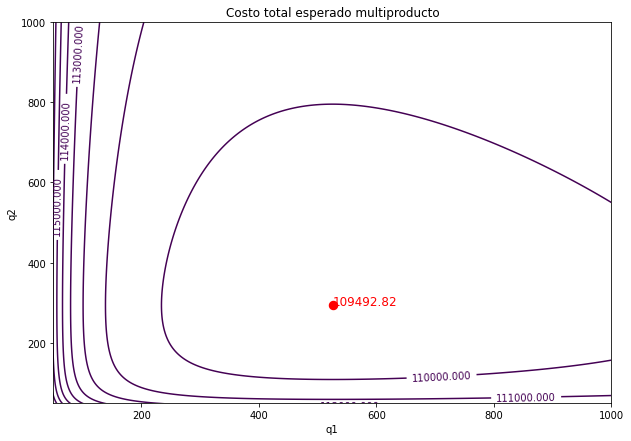

In [92]:
fig, ax0 = plt.subplots(figsize=(10,7))

# Contour
CS0 = ax0.contour(Q1, Q2, CTE2, 600)
ax0.set_title('Costo total esperado multiproducto')
ax0.set_xlabel('q1')
ax0.set_ylabel('q2')
ax0.set_xlim([50, 1000])
ax0.set_ylim([50, 1000])
ax0.clabel(CS0, inline=1, fontsize=10)

# Agregamos punto óptimo:
ax0.scatter(q1_opt, q2_opt, color="r", s=20, marker='o', linewidth=5)
ax0.text(q1_opt, q2_opt, f"{cte_opt_t:.2f}", fontsize=12, color='r')

plt.show()

Confirmamos que el costo obtenido con el algoritmo es el mínimo  posible.

**Conclusión**

En este caso pudimos conocer un poco sobre la teoría de inventario y como su aplicación puede reducir el costo para la organización. También, a optimizar con uno de los algoritmos más utilizados en la industria.
¿Quieres conocer más? Conoce la bibliografía utilizada:

*   https://jakevdp.github.io/PythonDataScienceHandbook/index.html
*   https://numpy.org/doc/stable/contents.html